In [1]:
import sklearn
%matplotlib inline
from preamble import *
from tools import plot_feature_importance
from sklearn.model_selection import train_test_split
from datasets.load_data import load_train_test_breast_cancer

## 2.4. 分类器的不确定度估计 ( 预测的置信程度 )

对于二分类问题

-   「反」类是 classes_属性的第一个元素
-   「正」类是 classes_属性的第二个元素

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 决策函数

小于阈值的代表反类，大于阈值的代表正类。

In [3]:
print("X_test.shape:", X_test.shape)
print("决策函数.shape:",gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
决策函数.shape: (25,)


In [4]:
# show the first few entries of decision_function
print("决策函数:", gbrt.decision_function(X_test)[:6])

决策函数: [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [5]:
print("决策函数的判别结果:\n",gbrt.decision_function(X_test) > 0)
print("模型的预测结果:\n", gbrt.predict(X_test))

决策函数的判别结果:
 [ True False False False  True  True False  True  True  True False  True  True False  True False False False  True  True  True  True  True False False]
模型的预测结果:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue' 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red' 'red' 'blue' 'blue']


In [6]:
# 将布尔值转化为0和1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# 将0和1转化为类别名称
pred = gbrt.classes_[greater_zero]
# pred 与 gbrt.predict 相同，说明以上的操作方式就是预测的方式
print("pred is equal to predictions:",np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [7]:
decision_function = gbrt.decision_function(X_test)
print("决策函数的输出很难解释。")
print("决策函数的最小值: {:.2f} 与最大值: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

决策函数的输出很难解释。
决策函数的最小值: -7.69 与最大值: 4.29


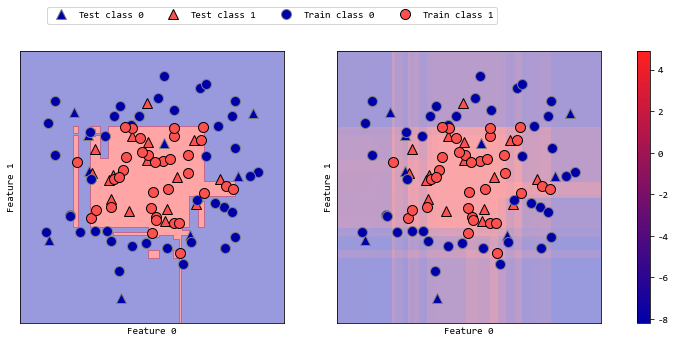

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

### 2.4.2 预测概率

概率大的类别是预测结果。

In [9]:
print("预测概率.shape:", gbrt.predict_proba(X_test).shape)

预测概率.shape: (25, 2)


In [10]:
# show the first few entries of predict_proba
print("预测概率输出结果:")
print(gbrt.predict_proba(X_test[:6]))

预测概率输出结果:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


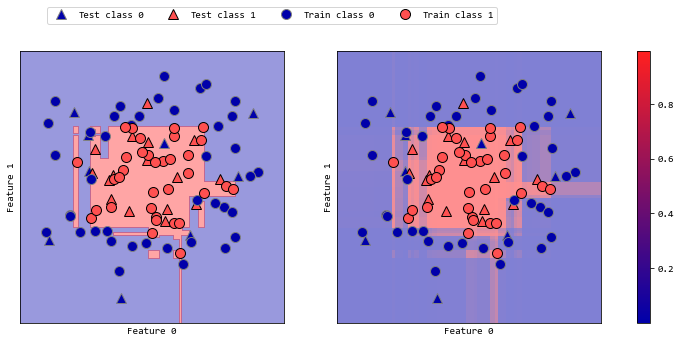

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0","Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

### 2.4.3 多分类问题的不确定度估计

1.  决策函数：决策函数输出值大的类别代表预测结果
2.  预测概率：预测概率输出值大的类别代表预测结果

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [13]:
print("决策函数.shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("决策函数的输出结果:")
print(gbrt.decision_function(X_test)[:6, :])

决策函数.shape: (38, 3)
决策函数的输出结果:
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In [14]:
print("决策函数输出的最大值所在列:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("模型预测的结果:")
print(gbrt.predict(X_test))

决策函数输出的最大值所在列:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0]
模型预测的结果:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0]


In [15]:
# show the first few entries of predict_proba
print("模型预测的概率值:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("模型预测的概率值求和:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

模型预测的概率值:
[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
模型预测的概率值求和: [1. 1. 1. 1. 1. 1.]


In [16]:
print("模型预测的最大概率值所在的列:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("模型预测的结果:")
print(gbrt.predict(X_test))

模型预测的最大概率值所在的列:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0]
模型预测的结果:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0]


In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("训练数据中的类别:", logreg.classes_)
print("测试数据的预测结果:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("决策函数最大值所在列:", argmax_dec_func[:10])
print("决策函数最大值所在列转化为类别:",logreg.classes_[argmax_dec_func][:10])

训练数据中的类别: ['setosa' 'versicolor' 'virginica']
测试数据的预测结果: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor']
决策函数最大值所在列: [1 0 2 1 1 0 1 2 1 1]
决策函数最大值所在列转化为类别: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor']


## 2.5 小结与展望

重点概念：

-   模型复杂度
-   泛化
    -   欠拟合：模型没有获取训练数据中的所有变化
    -   过拟合：模型对训练数据的所有变化拟合得过好，导致将噪声的变化也纳入模型，
    从而无法有效推广到新数据中。

常用模型总结：先从简单模型开始，了解数据后，再构建复杂模型。

-   简单模型
    -   最近邻：适用于小型数据集，是很好的基准模型，容易解释
    -   线性模型：可靠的首先算法，适用于非常大的数据集，也适用于高维数据
    -   朴素贝叶斯：只适用于分类问题，比线性模型速度快，适用于非常大的数据集，
    也适用于高维数据，精度通常要低于线性模型。
    -   决策树：速度快，不需要数据缩放，可以可视化，容易解释
-   复杂模型
    -   随机森林：比单棵决策树表现要好，鲁棒性好，不需要数据缩放，不适用于高维稀疏数据
    -   梯度提升决策树：与随机森林相比，精度高，训练速度慢，预测速度快，需要的内存少，调节的参数多。
    -   支持向量机：对于特征含义相似的中等大小的数据集效果最好，需要数据预处理 ( 缩放 ) ，对参数敏感
    -   神经网络：可以构建复杂的模型，适用于大型数据集，需要数据预处理 ( 缩放 ) ，对参数敏感，训练时间长
